In [1]:
import os
import easyocr
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
key = cv2. waitKey(1)
webcam = cv2.VideoCapture(0)
while True:
    try:
        ch, fr = webcam.read()
        cv2.imshow("Capturing", fr)
        key = cv2.waitKey(1)
        if key == ord('s'):
            
            cv2.imwrite(os.path.join("", 'img1.jpg'), fr)
            webcam.release()
            cv2.destroyAllWindows()
            break
        elif key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break
    except(KeyboardInterrupt):
        webcam.release()
        cv2.destroyAllWindows()
        break


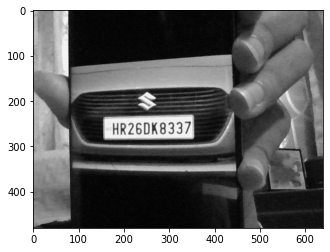

In [37]:

img = cv2.imread('img1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


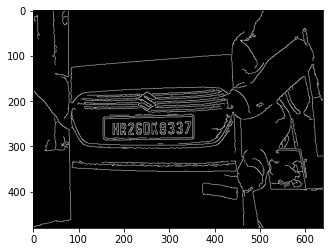

In [38]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)  # reducing unnecessary noise
edged = cv2.Canny(bfilter, 10, 200)  # detecting edges of the image
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [39]:
points = cv2.findContours(
    edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(points)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for i in contours:
    approx = cv2.approxPolyDP(i, 10, True)
    if len(approx) == 4:
        location = approx
        break
location


array([[[355, 233]],

       [[157, 235]],

       [[154, 279]],

       [[351, 284]]], dtype=int32)

In [40]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


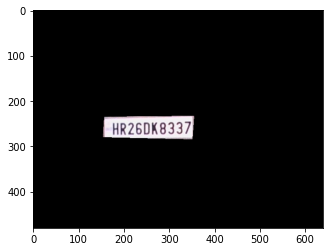

In [41]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


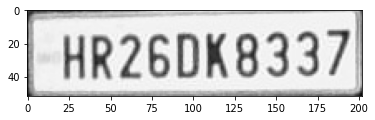

In [42]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
reader = easyocr.Reader(['en'])
res = reader.readtext(cropped_image)



In [43]:
res[0][1]


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


'HRZGDK8337 '